# EuroCrops Demo

This notebook assists with exploring the EuroCrops demo dataset.


### Imports

In [1]:
import datetime as dt
import numpy as np
import os
import h5py
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

### Load Data

In [2]:
# Specify dataset path
dataset_dir = '/home/maja/Documents/2020_EuroCrops/demo_dataset/HDF5'
# Get all paths
test_csv_dir  = os.path.join(dataset_dir, 'test/csv_files/')
test_h5_dir   = os.path.join(dataset_dir, 'test/h5_files/')
train_csv_dir = os.path.join(dataset_dir, 'train/csv_files/')
train_h5_dir  = os.path.join(dataset_dir, 'train/h5_files/')

In [3]:
h5_file_path = '/home/maja/hdd8/2020_EuroCrops/demo_dataset/March/HDF5s/AT_T33UWP_testTUM.h5'

In [2]:
h5_file_path = 'AT_new.h5'

<h4> Load Data- Alternative </h4>
If for some reason the code above does not work, the alternative solution is as follows:

In [ ]:
hdf= pd.HDFStore('AT_T33UWP_train.h5',mode='r') #here we directly load the .h5 file in one go using pandas.
hdf.keys()  #list all the keys or regions in the region (for eg- AT112)

In [ ]:
df_data=hdf.get('/AT112') #selecting a region from based on the key (AT112 for eg.)

#### Pick one of the h5 files and one region of it

In [3]:
# Pick one h5 file
h5_file_name = os.listdir(train_h5_dir)[0]
print('Chosen File: {}'.format(h5_file_name))


# Get all the available regions
h5_file_path = os.path.join(train_h5_dir, h5_file_name)
h5_file = h5py.File(h5_file_path, 'r')
regions =  list(h5_file.keys())
print('Available regions: {}'.format(regions))


# Load one region as a pandas df
df_data = pd.read_hdf(h5_file_path, regions[0])

Chosen File: DK_T32VNH.h5
Available regions: ['DK032', 'DK042', 'DK050']


In [3]:
h5_file = h5py.File(h5_file_path, 'r')
regions =  list(h5_file.keys())
print('Available regions: {}'.format(regions))


# Load one region as a pandas df
df_data = pd.read_hdf(h5_file_path, regions[0])

Available regions: ['AT126']


#### Load the corresponding labels

In [4]:
csv_file_name = h5_file_name[:-3] + '_labels.csv'
csv_file_path = os.path.join(train_csv_dir, csv_file_name)
df_labels = pd.read_csv(csv_file_path, index_col=0)

In [4]:
csv_file_name = '/home/maja/hdd8/2020_EuroCrops/demo_dataset/March/csv_labels/demo_eurocrops_AT126.csv'
# csv_file_path = os.path.join(train_csv_dir, csv_file_name)
df_labels = pd.read_csv(csv_file_name, index_col=0)

### Check out the data

- **Rows**: parcel ID <br>
- **Cols**: timesteps <br>
- **Cells**: 13 representative reflectances (median value) for a parcel, each corresponding to one band of the *SENTIEL-2* Satellites.

In [5]:
df_data.head(2)

,20190106,20190111,20190113,20190116,20190118,20190121,20190205,20190207,20190212,20190215,...,20191018,20191023,20191025,20191107,20191122,20191129,20191204,20191207,20191224,20191227
149,"[6056, 5803, 5088, 5489, 5598, 5690, 5674, 532...","[5318, 4929, 4286, 4852, 5132, 5261, 5330, 495...","[4334, 3931, 3362, 3535, 3611, 3705, 3769, 361...","[3750, 3506, 3136, 3355, 3450, 3650, 3808, 364...","[1621, 1211, 789, 600, 577, 582, 594, 557, 219...","[1784, 1517, 1252, 1418, 1623, 1870, 2024, 206...","[1588, 1373, 1177, 1372, 1564, 1787, 1958, 202...","[3708, 3659, 3076, 3101, 3155, 3186, 3194, 337...","[5012, 4801, 4234, 4594, 4831, 4937, 4991, 501...","[1562, 1356, 1216, 1426, 1567, 1742, 1939, 202...",...,"[6805, 6571, 6108, 6453, 6325, 6560, 6839, 634...","[4878, 4572, 4244, 4432, 4518, 4687, 4902, 473...","[1976, 1695, 1553, 1611, 1837, 2360, 2636, 263...","[1743, 1540, 1389, 1499, 1838, 2463, 2870, 285...","[2119, 1799, 1484, 1457, 1611, 1895, 2094, 201...","[6546, 6551, 6073, 6488, 6705, 6878, 6872, 692...","[1766, 1485, 1226, 1252, 1484, 1852, 2120, 207...","[1790, 1505, 1234, 1326, 1555, 1872, 2146, 208...","[2149, 1808, 1357, 1295, 1366, 1508, 1573, 163...","[1773, 1478, 1184, 1315, 1578, 1923, 2120, 215..."
154,"[5398, 5191, 4633, 5145, 5396, 5544, 5646, 554...","[2104, 1623, 1161, 1005, 1077, 1113, 1105, 109...","[2772, 2522, 2091, 2130, 2294, 2442, 2515, 257...","[2214, 1879, 1552, 1498, 1609, 1861, 1927, 193...","[3109, 2883, 2444, 2512, 2587, 2686, 2720, 261...","[1752, 1410, 1070, 1035, 1164, 1368, 1449, 155...","[1490, 1158, 898, 865, 1000, 1216, 1292, 1423,...","[2635, 1853, 1642, 1672, 2091, 2336, 2559, 223...","[2948, 2454, 2065, 2191, 2353, 2469, 2610, 249...","[1462, 1166, 934, 942, 1025, 1269, 1413, 1464,...",...,"[5915, 5811, 5395, 5696, 5616, 5906, 6167, 578...","[6311, 6218, 5906, 6377, 6340, 6496, 6760, 640...","[1522, 1215, 999, 899, 1091, 1547, 1709, 1689,...","[1507, 1107, 745, 514, 516, 579, 583, 548, 174...","[3453, 3126, 2712, 2828, 2954, 3211, 3454, 327...","[6537, 5940, 5561, 6148, 6845, 7157, 7241, 640...","[1837, 1427, 1075, 947, 1058, 1248, 1335, 1394...","[2175, 1825, 1414, 1275, 1383, 1555, 1543, 165...","[2366, 1885, 1495, 1512, 1700, 2030, 2119, 204...","[1713, 1308, 914, 818, 883, 1019, 1075, 1174, ..."


### Check out the labels and metadata

- **id**: parcel ID
- **nuts_id**: NUTs-3 region name
- **crop_code**: code corresponding to the given crop name
- **crop_name**: name according to the EAGLE-matrix

In [6]:
df_labels.head()

,crpgrpc,crpgrpn
recno,,
149,33200000,pasture_meadow
154,33200000,pasture_meadow
159,33200000,pasture_meadow
160,33200000,pasture_meadow
165,33200000,pasture_meadow


### Check out the data for one parcel

In [7]:
# The columns of the dataframe correspond to the timesteps
timesteps = list(df_data.columns)

# Pick the first row
example_row = df_data.iloc[0]
parcel_ID = example_row.name

# Get the corresponding label
label_code = df_labels.loc[parcel_ID]['crpgrpc']
label_name = df_labels.loc[parcel_ID]['crpgrpn']

print('{} grows on parcel {}'.format(label_name, parcel_ID))

pasture_meadow grows on parcel 149


### Look at the reflectance data for one parcel

#### Convert the timesteps into relative timestep

In [8]:
# Get the current year by taking the 10th timestep
year = int(timesteps[10][:4])
new_year_day = dt.datetime(year=year, month=1, day=1)


# Subtract current year
tf = '%Y%m%d'
dates_list = [((dt.datetime.strptime(date, tf)- new_year_day).days + 1) for date in timesteps]

#### Extract the row data into a numpy array

In [9]:
example_row = example_row.to_numpy()
example_row = np.stack(example_row, axis=0)

#### Plot the data

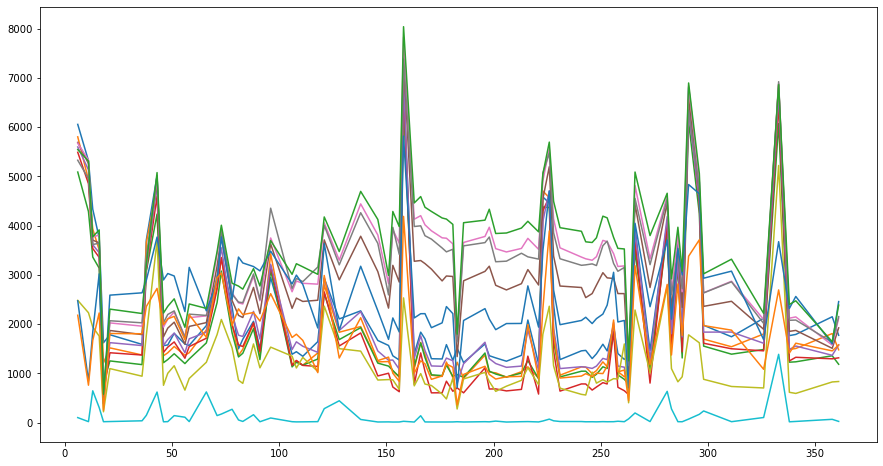

In [10]:
plt.rcParams['figure.figsize'] = [15, 8]
plt.plot(dates_list, example_row)
# plt.legend(bands)
plt.style.use('_classic_test_patch')